### **Ej 4 Estrellas**

## Importo librerias y defino df 

In [30]:
DATOS_DIR = 'C:/Users/Peter/Desktop/all/Facu/Mineria De Datos Usando Sistemas Inteligentes/Datos/'          # carpeta donde se encuentran los datasets

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv(DATOS_DIR + 'estrellas2023.csv')
df

,Edad,Temperatura,clase
0,10,6200,0
1,14,3000,0
2,-155,6600,0
3,-60,3450,0
4,120,6100,0
5,-300,2500,0
6,16,1400,1
7,-10,2300,1
8,-32,1900,1
9,2,6600,1


## Verifico que no hayan datos faltantes

In [41]:
df["Edad"].isnull().sum()

0

In [49]:
df.describe()

,Edad,Temperatura,clase
count,13.000000,13.000000,13.000000
mean,-32.923077,4003.846154,0.538462
std,100.120312,2233.873834,0.518875
min,-300.000000,1400.000000,0.000000
25%,-32.000000,2300.000000,0.000000
50%,-7.000000,3000.000000,1.000000
75%,10.000000,6200.000000,1.000000
max,120.000000,7500.000000,1.000000


## Defino funcion para hacer un diagrama de barras

In [34]:
def diagrama_de_barras(df, columna, titulo):
    """
    Genera un gráfico de barras de la columna especificada del DataFrame.
    
    Parámetros:
        df (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna a analizar.
    """
    barras = df[columna].value_counts()
    plt.figure()
    N = len(barras)
    plt.bar(np.arange(N), barras)  # Gráfico de barras
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.title(f'{titulo}')
    # Colocamos las etiquetas del eje x
    plt.xticks(np.arange(N), barras.index)
    plt.show()

## A - Discretizo por frecuencia

edad_frecuencia
Baja    7
Alta    6
Name: count, dtype: int64
Rangos de los intervalos: [-300.   -7.  120.]


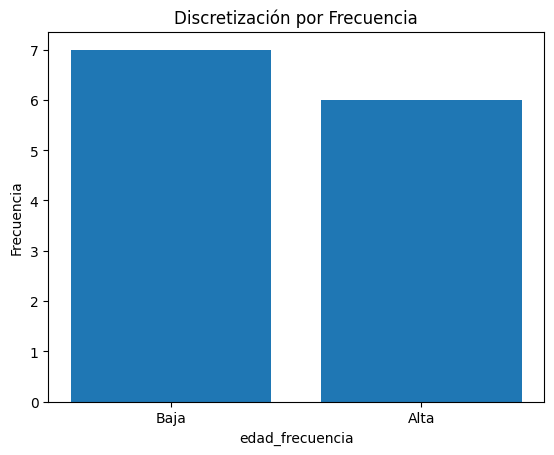

In [47]:
etiq = ["Baja","Alta"]

df['edad_frecuencia'], bins = pd.qcut(df["Edad"], q=len(etiq), labels=etiq, retbins=True)

print(df['edad_frecuencia'].value_counts())

print(f'Rangos de los intervalos: {bins}')

diagrama_de_barras(df,'edad_frecuencia','Discretización por Frecuencia')

## B - Discretizo por rango

edad_rango
Alta    11
Baja     2
Name: count, dtype: int64
Rangos de los intervalos: [-300.42  -90.    120.  ]


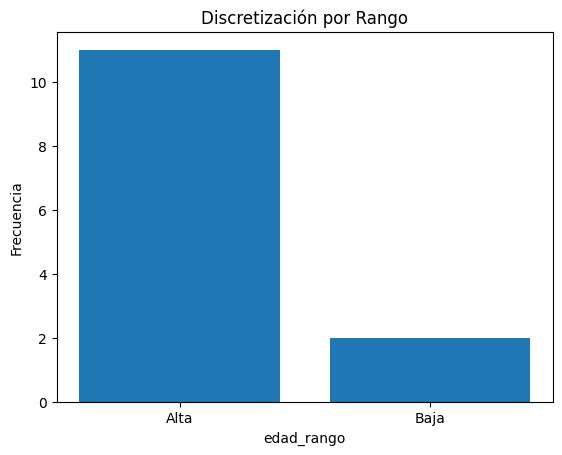

In [50]:
etiq = ["Baja","Alta"]

# Discretización por RANGO
df['edad_rango'], bins = pd.cut(df["Edad"],bins=len(etiq),labels=etiq, retbins=True)

print(df['edad_rango'].value_counts())

print(f'Rangos de los intervalos: {bins}')

diagrama_de_barras(df,'edad_rango','Discretización por Rango')

## C - Calculo la correlacion lineal entre Edad y Temperatura

In [11]:
# Calculamos la matriz de correlación utilizando algunos atributos numéricos
corr_matrix = df[['Edad','Temperatura']].corr()
display(corr_matrix)

,Edad,Temperatura
Edad,1.000000,0.159637
Temperatura,0.159637,1.000000


## D - Hago Diagrama de Caja de Tukey y calculo valores

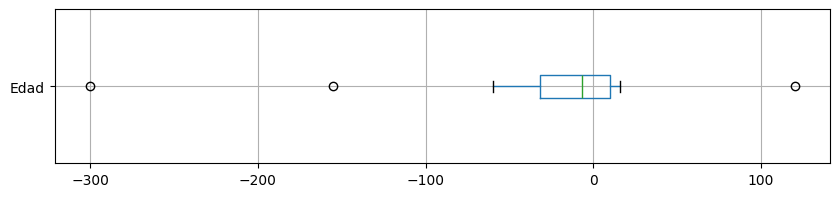

In [37]:
# Define el tamaño de la figura
plt.figure(figsize=(10, 2))

# Trama el diagrama de caja
df.boxplot(column=['Edad'], vert=False)

# Muestra el diagrama de caja
plt.show()

In [57]:
# Extraemos los cuartiles y mediana (Q2 = mediana)
desc = df["Edad"].describe()
Q1 = desc['25%']
Q2 = desc['50%']
Q3 = desc['75%']

# Calculamos el IQR
IQR = Q3 - Q1

# Calculamos los bigotes
b_inf = Q1 - 1.5 * IQR
b_sup = Q3 + 1.5 * IQR

# Calculamos los intervalos de atípicos
atip_lev_inf = Q1 - 3 * IQR
atip_lev_sup = Q3 + 3 * IQR
atip_ext_inf = Q1 - 4.5 * IQR
atip_ext_sup = Q3 + 4.5 * IQR

# Identificamos valores atípicos
atipicos_leves = df[
    ((df["Edad"] < b_inf) & (df["Edad"] >= atip_ext_inf)) |
    ((df["Edad"] > b_sup) & (df["Edad"] <= atip_ext_sup))
]["Edad"].to_list()

atipicos_extremos = df[
    (df["Edad"] < atip_ext_inf) | 
    (df["Edad"] > atip_ext_sup)
]["Edad"].to_list()

# Imprimimos los resultados
print("\nMediana = ", Q2,"\nQ1 = ", Q1,"\nQ3 = ", Q3)
print("Rango Intercuartilico = ", IQR)
print(f'Bigote superior: {b_sup}')
print(f'Bigote inferior: {b_inf}')

print(f'Intervalo de atípicos leves: [{atip_lev_inf}, {atip_lev_sup}]')
print(f'Valores de atípicos leves: {atipicos_leves}')

print(f'Intervalo de atípicos extremos: [{atip_ext_inf}, {atip_ext_sup}]')
print(f'Valores de atípicos extremos: {atipicos_extremos}')



Mediana =  -7.0 
Q1 =  -32.0 
Q3 =  10.0
Rango Intercuartilico =  42.0
Bigote superior: 73.0
Bigote inferior: -95.0
Intervalo de atípicos leves: [-158.0, 136.0]
Valores de atípicos leves: [-155, 120]
Intervalo de atípicos extremos: [-221.0, 199.0]
Valores de atípicos extremos: [-300]
